# Analysis and Prediction on California Wildfire and Climate Variables

# Overview

In California, wildfire has been a thorny issue over the years. In 2018, the state went through the deadliest and most destructive wildfire season in California’s history upon that time. In the past year, the record was refreshed. The issue is becoming more and more severe. More importantly, those wildfire incidents have caused lots of problems, including burning out the wild forests, soil erosion, and human casualties, impairing both environmental condition and public security. Connecting them to global warming, wildfires require our urgent attention. **With this analysis, we want to focus on measuring the relationship between climate variables of humidity, temperature, windspeed, and precipitation, and the scale of wildfire in California based on the wildfire incidents in 2013-2019, as well as predicting the scale of wildfire in California by using these climate variables.** As a result, we have found that only the humidity has significant relationship with the scale of the wildfire, and we have provided a predictive model for the scale of the wildfire in California.

# Names

- Jiayi Zhao
- Wenbo Hu
- Yunyi Huang
- Xiaotong Zeng

<a id='research_question'></a>
# Research Question

Is there a statistically significant relationship between the scale (burning area) of wildfire and climate variables in California that are associated with global warming such as air relative humidity level, temperature, wind speed, and precipitation? Additionally, how can we utilize these climate variables to predict the wildfire events in California and the scale of wildfire?

<a id='background'></a>

# Background & Prior Work

The continuing growth of severity of wildfire in recent years has led to tremendous ecological damage and economic downfall to the society. The 2020 California wildfire season, the largest wildfire season recorded in California’s modern history, suggests that the recent wildfire cases tend to become more intense and affect greater scales. Although the direct cause for wildfire, such as lighting campfires and discarding lit cigarettes, is not always associated with climate change, other climate variables including temperature and humudity level are key factors that would contribute to the increase of the risk and extent of wildfire. Warmer weather could lead to a longer fire season and proliferate insects that weaken trees. Meanwhile, low humidity would make forests drier and more susceptible to burning.  
Prior works performed on this topic suggest that the average wildfire seasons have increased by three and a half months than a few decades ago. The number of annual large fires and the burning areas also increased significantly over the last decade. These phenomena are tied with rising temperatures which is the direct result of global warming __[1]__ . At the same time, global warming also causes the decline in relative humidity around the globe which leads to drier conditions making the spread of wildfire more quickly and readily __[2]__. Lastly, we have found many exploratory analysis on wildfire cases in California discovering a positive trend in the burning areas as the year progresses __[3]__.
Although climate change does not have a direct relationship with what starts the wildfire, we are interested in discovering how climate factors such as temperature, wind speed, precipitation, and humidity help spread the wildfires expanding the burning areas.  

**References:**
1. “Here's How Climate Change Affects Wildfires.” *Environmental Defense Fund*, www.edf.org/climate/heres-how-climate-change-affects-wildfires. 
2. Willett, Kate. “Investigating Climate Change's 'Humidity Paradox'.” *World Economic Forum*, www.weforum.org/agenda/2020/12/climate-change-humidity-paradox/#:~:text=The%20atmosphere%2C%20land%20and%20oceans,evaporated%20from%20the%20Earth's%20surface.&amp;text=According%20to%20the%20Clausius%2DClapeyron,every%201C%20of%20temperature%20rise.  
3. Patel, Sourav. “Wildfires in California - An Exploratory Data Analysis.” *Kaggle*, 3 Oct. 2020, www.kaggle.com/skpatel12/california-wildfire-analysis. 



# Hypothesis


We believe that there is a relationship between the climate variables and the scale of wildfires. The scale of wildfires will have a negative correlation with air relative humidity and precipation and a positive correlation with temperature, wind speed. As air gets drier and warmer and wind and precipation get larger, we expect the scale of wildfire to increase. 

We believe that global warming may also increase the scale of wildfires. 

# Dataset(s)

**Dataset Name:** California Wildfire Incidents (2013-2020) --- List of wildfires in California between 2013 and 2020<br>
**Link to the dataset:** https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020 <br>
**Number of observations:** 1636 x 40 <br>
**Description of the dataset:** This dataset contains the list of wildfires that have occurred in California between 2013 and 2020, and it also includes other variables such as location and injuries. 


**Dataset Name:** NOAA Daily global surface summary 2013-2019<br>
**Link to the dataset:** https://www.ncei.noaa.gov/data/global-summary-of-the-day/archive/ <br>
**Number of observations:** We are going to use the sub datasets of the year 2013-2019, as well as the dataset for stations. The number of observations for each datasets are below:
    - 2013: 4.01m
    - 2014: 4.12m
    - 2015: 4.20m
    - 2016: 4.29m
    - 2017: 4.29m
    - 2018: 4.01m
    - 2019: 3.29m
**Description of the dataset:** These datasets contain the weather records, including temperature, precipitation, and wind speed, etc., from different weather stations around the world. There is no direct information of humidity from this dataset, so we use the temperature and dew point to calculate the relative humidity percentage.



**Dataset Name:** The Integrated Surface Data (ISD) Station List<br>
**Link to the dataset:**  https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.csv <br>
**Number of observations:** 29700 <br>
**Description of the dataset:** This dataset contains identification numbers and information for weather stations in the Federal Climate Complex ISD.

**Data Combination:** In order to perform our analysis on these dataset, we firstly clean and wrangle each dataset separately. For the second dataset, which is the NOAA GSOD Daily global surface summary, we will need to combine the sub datasets together since the datasets were divided into different years. After we finished cleaning each dataset, we will merge them together by weather station id and date of the event.

# Setup

### Import Necessary Libraries

In [2]:
# Import pandas to read csv file and manage heterogenous data
import pandas as pd

# Import numpy to store numeric information and perform numerical analysis
import numpy as np

# Import seaborn and matplotlib to visualize data
import seaborn as sns
import matplotlib.pyplot as plt

# Import numpy to store numeric information and perform numerical analysis
import numpy as np

# Import seaborn and matplotlib to visualize data
import seaborn as sns
import matplotlib.pyplot as plt

#Import scipy to gather statistics
from scipy import stats

# Import patsy and statsmodels for regression analysis
import patsy
import statsmodels.api as sm

# Import math for using some math function
import math

import warnings

import os

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

### Import Data Sets

In [17]:
# Load the California wildfire incidents data set in data frame
# We get this data set from Kaggle (https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020)
wildfire = pd.read_csv("California_Fire_Incidents.csv")


# Load the US weather station ID data set in data frame
# We get the Integrated Surface Data (ISD) station list from ncdc.noaa.gov
station = pd.read_csv("https://www1.ncdc.noaa.gov/pub/data/noaa/isd-history.csv")



# Load the US weather daily data set from 2013 to 2019 in data frame
# We get this data from ncei.noaa.gov and download to the local.
# (https://www.ncei.noaa.gov/data/global-summary-of-the-day/archive/)
for dirname, _, filenames in os.walk('/Users/wenbohu/Desktop/Weather'):
    for filename in filenames:
        print((os.path.join(dirname, filename)))
        
# get all subdiretory of all tables
file_dict ={}
for path, dirs, files in os.walk('/Users/wenbohu/Desktop/Weather', topdown=False):
    file_dict[path]=files
    
paths = list(file_dict.keys())

events = []
for path in paths:
    events += [os.path.join(path,file) for file in file_dict[path]]
    

# Data Cleaning

Since we have three data sets, we deicide to clean them seperatly and merge them by locations.

### First, we clean the California wildfire incidents data set

Since we only need the dates, acres burned (scale), and county name for the following analysis, we update these information back to `wildfire`.

In [3]:
# delete the irrelevant columns
wildfire = wildfire[['AcresBurned','Started','Counties', 'Latitude', 'Longitude']]

# change the started time into date
wildfire['Started'] = [x[0:10] for x in wildfire['Started']]

# change the 'Started' column name into 'Date'
wildfire = wildfire.rename({'Started':'Date'}, axis='columns')

#drop the null values 
wildfire['Latitude'] = wildfire['Latitude'].apply(lambda x: np.nan if x == 0 else x)
wildfire = wildfire.dropna().reset_index(drop=True) 

Now take a look on the `wildfire` dataframe

In [4]:
wildfire.head()

,AcresBurned,Date,Counties,Latitude,Longitude
0,257314.0,2013-08-17,Tuolumne,37.857000,-120.086000
1,30274.0,2013-05-30,Los Angeles,34.585595,-118.423176
2,27531.0,2013-07-15,Riverside,33.709500,-116.728850
3,27440.0,2013-08-10,Placer,39.120000,-120.650000
4,22992.0,2013-07-22,Fresno,37.279000,-119.318000


### Second, clean the Integrated Surface Data (ISD) station list

In [5]:
# Since the weather station ID is a combination of column 'USAF' and 'WBAN',
# we combine these two columns into a new column called 'ID'
station['ID']= station['USAF'].astype(str) + station['WBAN'].astype(str)

# we only analyze California weather
station = station[(station['STATE']=='CA') & (station['CTRY']=='US')].reset_index(drop=True)

# station only need to include the ID and the nameof the station
pd.set_option("max_rows", None)

Now take a look on the `station` dataframe

In [6]:
station.head()

,USAF,WBAN,STATION NAME,CTRY,STATE,ICAO,LAT,LON,ELEV(M),BEGIN,END,ID
0,690020,93218,JOLON HUNTER LIGGETT MIL RES,US,CA,KHGT,36.000,-121.233,317.0,19640715,19970401,69002093218
1,690020,99999,JOLON HUNTER LIGGETT MIL RES,US,CA,KHGT,36.000,-121.233,317.0,20030702,20030801,69002099999
2,690070,93217,FRITZSCHE AAF,US,CA,KOAR,36.683,-121.767,43.0,19600404,19930831,69007093217
3,690140,93101,EL TORO MCAS,US,CA,KNZJ,33.667,-117.733,116.7,19890101,19990630,69014093101
4,690150,93121,TWENTY NINE PALMS,US,CA,KNXP,34.300,-116.167,625.1,19900102,20210312,69015093121


### Thrid, we merge the`wildfire` and `station` dataframes by matching the LATITUDE and LONGTITUDE of the wildfire incident locations and weather stations. 
We compare each error index (0.1, 0.2, 0.3, 0.5) in order to find which diameter we should choose for more unique stations is determined.

In [7]:
IDlist = []
for i,j in wildfire.iterrows():
    before = len(IDlist)
    for a,b in station.iterrows():
        #about 50km * 40km when 0.5 then tried 0.3, 0.1, and 0.2
        if (((b['LAT'] <= j['Latitude'] + 0.2) and (b['LAT'] >= j['Latitude'] - 0.2)) 
        and (( b['LON'] <= j['Longitude'] + 0.2) and ( b['LON'] >= j['Longitude'] - 0.2))):
            IDlist.append(b['ID'])
            break
    after = len(IDlist)
    if (before == after):
        IDlist.append("Not_Found")

In [8]:
# 0.5-95 0.3-119 0.1-119 0.2-127(THIS IS THE BEST!!!!)
# when 0.1 it's also 119 but lots of not found values
unique = []
for x in IDlist:
    if x not in unique:
        unique.append(x)
print(len(unique))

127


Then, we create a dataframe called `matched_wildfire` that consists the scale, date, county name, latitude, and longitude of the wildfire incidents and the weather station ID in that incident area.

In [9]:
IDlist = []
row_fire = []
join_id =[]
num = 1
# create a new dataframe to store these matched data
matched_wildfire = pd.DataFrame(columns=wildfire.columns)

# iterate the rows in wildfire and station to find the matched data
for i,j in wildfire.iterrows():
    for a,b in station.iterrows():
        #about 22.2km * 20km area from fire accidents   
        if (((b['LAT'] <= j['Latitude'] + 0.2) and (b['LAT'] >= j['Latitude'] - 0.2)) 
        and (( b['LON'] <= j['Longitude'] + 0.2) and ( b['LON'] >= j['Longitude'] - 0.2))):
            IDlist.append(b['ID'])
            join_id.append(num)
            num += 1
            row_fire.append(list(j))
            break
        
matched_wildfire = matched_wildfire.append(pd.DataFrame(row_fire,columns=wildfire.columns))
matched_wildfire = matched_wildfire.assign(Station_ID = IDlist)
matched_wildfire = matched_wildfire.assign(Join_ID=join_id)

Now, take a look on the `matched_wildfire`

In [10]:
matched_wildfire.head()

,AcresBurned,Date,Counties,Latitude,Longitude,Station_ID,Join_ID
0,30274.0,2013-05-30,Los Angeles,34.585595,-118.423176,99999923180,1
1,27440.0,2013-08-10,Placer,39.120000,-120.650000,72584523225,2
2,20292.0,2013-08-07,Riverside,33.861570,-116.904270,72068799999,3
3,8073.0,2013-09-09,Shasta,40.498332,-122.535496,9999994222,4
4,7055.0,2013-07-06,San Diego,32.954350,-116.473810,99999923178,5


### Fourth, using the `matched_wildfire` data frame merge with the weather dataset from 2013 to 2019 so that every wildfire incident has the weather data of that day. 

Take a brief look on how the dataset of one station in the weather dataset in 2013 looks like

In [11]:
example = pd.read_csv("/Users/wenbohu/Desktop/Weather/2013/40854099999.csv")
example.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,40854099999,2013-01-01,29.083925,58.450397,940.0,"BAM, IR",44.1,8,23.9,8,...,7.8,999.9,56.1,,36.3,,0.0,G,999.9,0
1,40854099999,2013-01-02,29.083925,58.450397,940.0,"BAM, IR",43.4,10,24.7,10,...,12.0,999.9,56.1,,33.8,,0.0,G,999.9,0
2,40854099999,2013-01-03,29.083925,58.450397,940.0,"BAM, IR",43.9,7,21.5,7,...,7.8,999.9,56.1,,36.3,,0.0,G,999.9,0
3,40854099999,2013-01-04,29.083925,58.450397,940.0,"BAM, IR",44.4,8,23.3,8,...,5.8,999.9,57.2,,36.3,,0.0,G,999.9,0
4,40854099999,2013-01-05,29.083925,58.450397,940.0,"BAM, IR",45.2,10,24.5,10,...,12.0,999.9,57.2,,35.6,,0.0,G,999.9,0


Loop the `matched_wildfire` and find the weather data with the matched date and station ID

In [12]:
# Get the weather information of wildfire start date 
row_weather = []
join_id = []
num = 1

# create a data frame to store the weather data
weather = pd.DataFrame(columns = example.columns)

for i, j in matched_wildfire.iterrows():
    for file in events:
        if num in join_id:
            break
        if (file[-15:-4] == j['Station_ID']):
            temp = pd.read_csv(file)
            for a, b in temp.iterrows():
                if (b["DATE"] == j['Date']):
                    row_weather.append(list(b))
                    join_id.append(num)
                    break 
    num += 1

Append these matched weather data to `weather`

In [13]:
weather = pd.DataFrame(columns = example.columns)
weather = weather.append(pd.DataFrame(row_weather, columns = example.columns))
weather = weather.assign(Join_ID = join_id)

Now, take a look on the `weather`

In [14]:
weather.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT,Join_ID
0,99999953150,2013-06-16,37.7592,-119.82080,2017.8,"YOSEMITE VILLAGE 12 W, CA US",59.3,24,9999.9,0,...,999.9,67.8,,52.9,,0.0,G,999.9,0,10
1,72383023187,2013-07-19,34.7436,-118.72420,1374.6,"SANDBERG, CA US",80.5,24,33.8,24,...,27.0,96.1,,66.0,,0.0,G,999.9,0,12
2,99999993243,2013-05-03,37.2381,-120.88250,23.8,"MERCED 23 WSW, CA US",71.3,24,9999.9,0,...,999.9,93.6,,46.2,,0.0,G,999.9,0,18
3,74504893210,2013-10-04,39.4900,-121.61833,57.9,"OROVILLE MUNICIPAL AIRPORT, CA US",66.2,24,27.4,24,...,27.0,82.9,,51.1,,0.0,G,999.9,0,19
4,74504893210,2013-06-03,39.4900,-121.61833,57.9,"OROVILLE MUNICIPAL AIRPORT, CA US",80.8,24,51.1,24,...,999.9,96.1,,61.0,,0.0,G,999.9,0,20


Merge `matched_wildfire` and `weather`, and store this merge dataset in local as a csv file

In [15]:
dataframe = matched_wildfire.merge(weather, on = 'Join_ID')
dataframe.to_csv('/Users/wenbohu/Desktop/df.csv')

### Lastly, import and clean this final data frame

The weather variable columns descriptions:
 - TMP: Mean temperature for the day in degrees Fahrenheit to tenths. Missing = 9999.9
 - DEWP: Mean dew point for the day in degrees Fahrenheit to tenths. Missing = 9999.9
 - WDSD: Mean wind speed for the day in knots to tenths. Missing = 999.9
 - PRCP: Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths.

In [3]:
df = pd.read_csv('df.csv')

df = df[['AcresBurned', 'Date', 'Counties','TEMP','DEWP','WDSP','PRCP']] 

# By the column description, we replace the missing value (9999.9 or 999.9) with np.nan
df['TEMP'] = df['TEMP'].replace(9999.9, np.nan, regex=True) 
df['DEWP'] = df['DEWP'].replace(9999.9, np.nan, regex=True) 
df['WDSP'] = df['WDSP'].replace(999.9, np.nan, regex=True) 
# Drop the NAN value
df = df.dropna(subset=['TEMP','DEWP','WDSP'])

# convert the temperature and the dewpoint from Fahrenheit to Celsius
df['TEMP'] = 5.0 / 9.0 * (df['TEMP'] - 32.0)
df['DEWP'] = 5.0 / 9.0 * (df['DEWP'] - 32.0)

# calculate saturation vapor pressure(Es) and actual vapor pressure(E) in millibars.
df['Es'] = 6.11*10.0**(7.5*df['TEMP']/(237.7+df['TEMP']))
df['E'] = 6.11*10.0**(7.5*df['DEWP']/(237.7+df['DEWP']))

# Once you have the saturation vapor pressure and the actual vapor pressure, 
# relative humidity(RH) can be computed by dividing the actual vapor pressure by the saturation vapor pressure 
# and then multiplying by 100 to convert the quantity to a percent.
df ['RelaHumPct'] = (df['E']/df['Es'])*100

# Rename the columns
df = df.rename(columns={'Counties':'County','TEMP':'Temp','DEWP':'DewPt','WDSP': 'WindSpd','PRCP':'Precipitation'})
df = df[['AcresBurned','Date','County','Temp','WindSpd','Precipitation','RelaHumPct']]



#### The Final Dataframe

Description on the columns of the final dataframe:
 - AcresBurned: The area of the wildfire incident burns in degree acre
 - Date: The date of the wildfire incident
 - County: The county where the wildfire incident belongs
 - Temp: Mean temperature for the day in degrees Celsius
 - DewPt: Mean dew point for the day in degrees Celsius
 - WindSpd: Mean wind speed for the day in knots to tenths.
 - Precipitation: Total precipitation (rain and/or melted snow) reported during the day in inches and hundredths
 - RelaHumPct: Relative humidity for the day in percentage

In [4]:
df.head()

,AcresBurned,Date,County,Temp,WindSpd,Precipitation,RelaHumPct
1,712.0,2013-07-19,Kern,26.944444,13.2,0.0,18.527509
3,305.0,2013-10-04,Butte,19.000000,10.1,0.0,23.086979
4,298.0,2013-06-03,Butte,27.111111,3.5,0.0,35.698961
5,240.0,2013-06-08,Alameda,28.666667,4.0,0.0,35.230183
6,200.0,2013-07-04,Tehama,36.500000,10.0,0.0,19.131822


# Data Analysis & Results

## Descriptive Analysis

First, we'll get a sense of what information we have in the df dataset.

In [5]:
# determine the shape of the data
df.shape

(372, 7)

In [6]:
# get descriptive statistics for quantitative variables
df.describe()

,AcresBurned,Temp,WindSpd,Precipitation,RelaHumPct
count,372.000000,372.000000,372.000000,372.000000,372.000000
mean,6147.862903,22.626045,6.004301,0.005376,41.945580
std,42796.625726,5.260780,2.880510,0.074306,17.166863
min,0.000000,2.611111,0.300000,0.000000,6.578408
25%,33.000000,19.041667,4.300000,0.000000,29.354164
50%,78.000000,22.972222,5.400000,0.000000,38.853739
75%,241.750000,26.236111,6.900000,0.000000,53.300922
max,410203.000000,41.222222,22.000000,1.360000,91.355476


According to the results above, we can see that there are 372 observations in total for seven variables, and those five of the numerical variables are the ones we are going to focus here. 
Among these five variables, AcresBurned has the largest standard deviation around 42796.626, which means that the data points are far from mean. Precipitation has the smallest standard deviation around 0.005, which means that the data points are clustered closely around the mean. 
The table also shows the minimum and maximum value, and the value at 25%, 50%, 75% for each variables.

In [7]:
# Checking the data type
df.dtypes

AcresBurned      float64
Date              object
County            object
Temp             float64
WindSpd          float64
Precipitation    float64
RelaHumPct       float64
dtype: object

## EDA: Exploratory Data Analysis

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

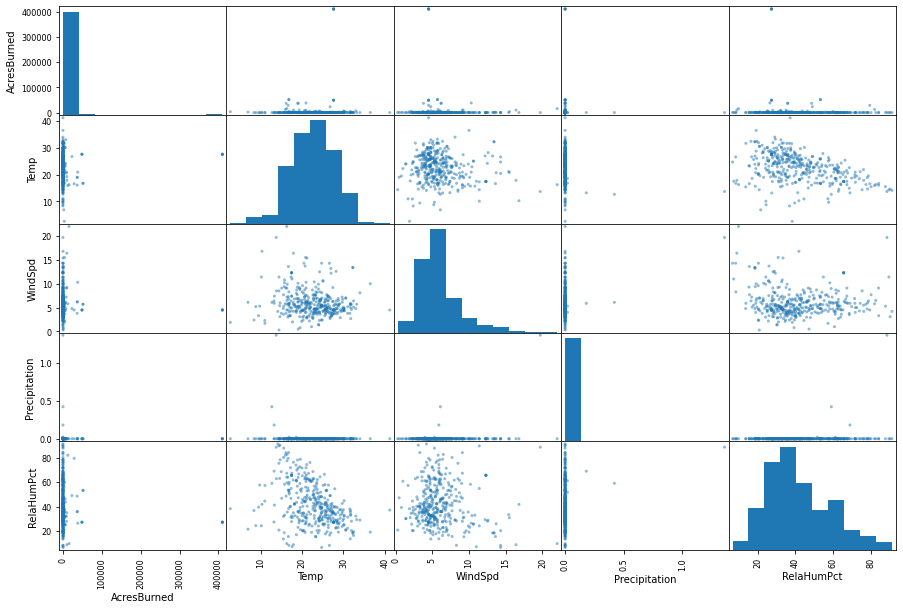

In [8]:
# first look at the scatter matrix
scatter = pd.plotting.scatter_matrix(df, figsize=(15, 10))

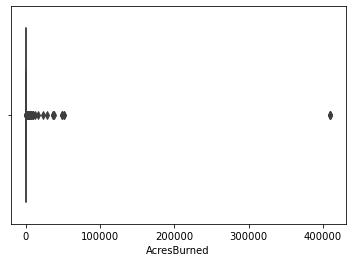

In [9]:
# look at burning areas (in acres) distributions
sns.boxplot(x=df['AcresBurned']);

Here you should see a distribution skewed to the right, with most burning area are in few acreas and a few getting many more.
We note that there exists an outlier that had 410203 acres burnning area. This is an interesting data point and something we want to investigate further.

In [7]:
outlier = df[df['AcresBurned'] == df['AcresBurned'].max()]
outlier

,AcresBurned,Date,County,Temp,WindSpd,Precipitation,RelaHumPct
221,410203.0,2018-07-27,Colusa,27.611111,4.5,0.0,27.269169
222,410203.0,2018-07-27,Glenn,27.611111,4.5,0.0,27.269169
223,410203.0,2018-07-27,Lake,27.611111,4.5,0.0,27.269169
224,410203.0,2018-07-27,Mendocino,27.611111,4.5,0.0,27.269169


#### If we Google this date, we see that [Mendocino complex fire affects four counties](https://en.wikipedia.org/wiki/Mendocino_Complex_Fire). It makes sense that the readership increased by 410203 there. 
Before we carry out our analysis, we're going to **remove the repeated three rows and leave with Mendocino. Store this output in `df` again.**

At this point, we have noticed that there are many wildfire incidents that spreaded into multiple counties, meaning that there are duplicates in the current dataset. To counter this problem, we decided to drop all the duplicates. Also, we decided not to drop the outlier of the acres burned since it is an actual data point.

In [8]:
df = df.drop_duplicates(subset=['Date','AcresBurned'])

Let's take a look at the change in acreas burned after removing the outliers.

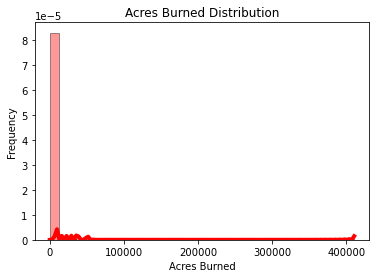

In [9]:
# AcresBurned
ax = sns.distplot(df['AcresBurned'], hist=True, kde=True, 
                  bins=int(len(df['AcresBurned'])/10),
                  color='red',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})

ax.set(xlabel='Acres Burned', ylabel='Frequency', title='Acres Burned Distribution')
plt.show()

Here we see the plot of **acres burned**, and the data is strongly skewed-right distributed because of the Mendocino complex fire. We will perform a log10-transformation to shift the values away from being centered near zero.

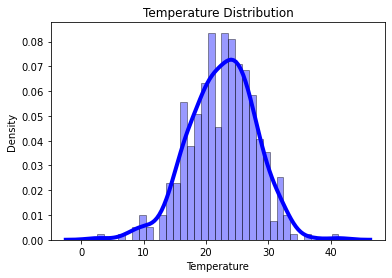

In [10]:
# look at temperature distributions
ax = sns.distplot(df['Temp'], hist=True, kde=True, 
                  bins=int(len(df['Temp'])/10),
                  color='blue',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})

ax.set(xlabel='Temperature', ylabel='Density', title='Temperature Distribution')
plt.show()

Here we see the plot of **temperature**, and the data is normally distributed with the median approximately at 24. 

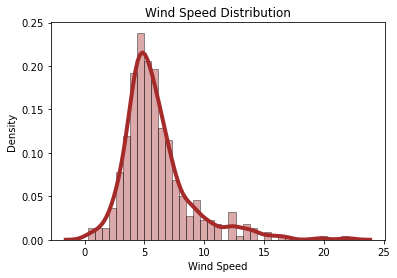

In [10]:
# look at wind speed distributions
ax = sns.distplot(df['WindSpd'], hist=True, kde=True, 
                  bins=int(len(df['WindSpd'])/10),
                  color='brown',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})

ax.set(xlabel='Wind Speed', ylabel='Density', title='Wind Speed Distribution')
plt.show()

For **Wind Speed**, the data seems to follow a skewed-right distribution with the median approximately at 5 and a few outliers that are greater than 15.

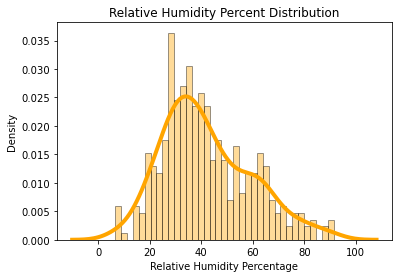

In [11]:
# look at air relative humidity (in percentage) distributions
ax = sns.distplot(df['RelaHumPct'], hist=True, kde=True, 
                  bins=int(len(df['RelaHumPct'])/10),
                  color='orange',hist_kws={'edgecolor':'black'}, 
                  kde_kws={'linewidth':4})

ax.set(xlabel='Relative Humidity Percentage', ylabel='Density', title='Relative Humidity Percent Distribution')
plt.show()

 For **Relative Humidity Percentage**, the data seems to follow a weak normal distribution with a light skew to the right, having the median approximately at 35 and a few outliers that are greater than 85.

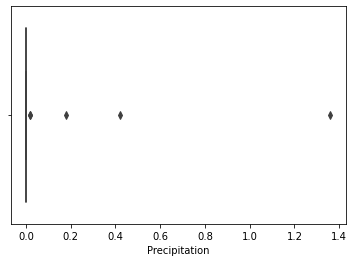

In [12]:
sns.boxplot(x=df['Precipitation']);

For **Precipitation**, the median is 0 and there are a few outliers since the lack of precipitation in this region. We decided to not to examine the relationship between precipitation and the acres burned, because most of time there was no precitation, making the process unnecessary.

## Inferential Analysis

### Relationship between variables

### Acres burned V.S. Month

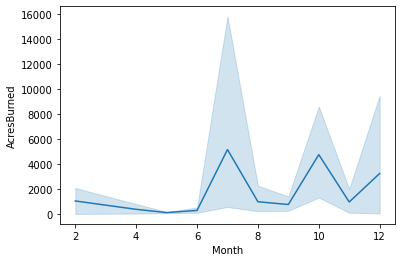

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
sns.lineplot(x = 'Month', y = 'AcresBurned', data = df);

The lineplot above shows us the changing of the scale of the wildfire incidents seasonally. We can see that the acre burned are high in July and October, implying that the wildfire incidents are likely to be severe in summer and fall.

### Acres burned V.S. Temperature

Plot the relationship between the acres burned and temperatures of the wildfire incidents across the years in this dataset to get a sense of what's going on.

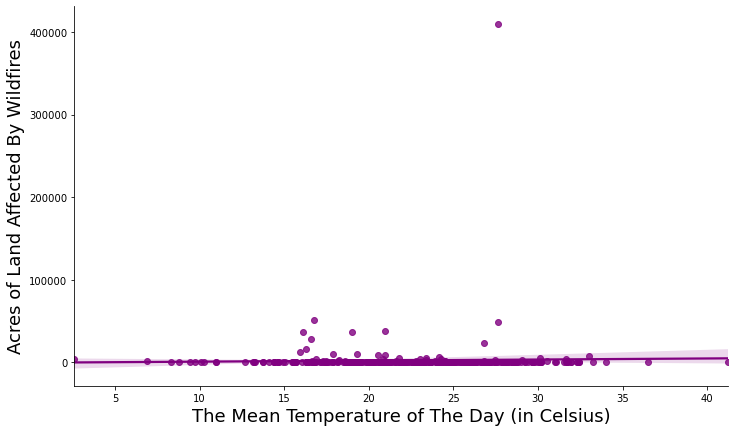

In [15]:
# Relationship between the arces burned and temperatures of wildfire incidents
sns.lmplot(x = 'Temp',
           y = 'AcresBurned',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'purple'},
           scatter_kws={'color': 'purple'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Mean Temperature of The Day (in Celsius)', size=18)
plt.title('');

The plot above shows no relationship between these two variables but note that there are outliers in acres burned, where acres burned is much higher than number of temperature degree. Most of the acres burned data are clustered around zero Celsius. This is because the distributions of acres burned is skewed right. This suggests that we may need to transform these data to use linear regression to ensure that the large outlier values are not driving our relationship.

So, as discussed in class, we **apply a log10-transformation the AcresBurned count data, with an offset of 0.1.** This will shift the values away from being centered near zero when put on the log scale. Then, we store this in a new column `AcresBurned_log10`.

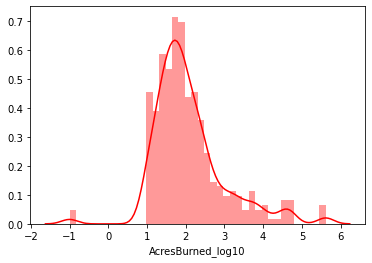

In [15]:
df['AcresBurned_log10'] = np.log10(df['AcresBurned'] + 0.1)

sns.distplot(df['AcresBurned_log10'], 
             kde=True, bins=40, color="red");

The distribution appears to be less skewed, but there is a value around -1. This is because there were zeroes in the original dataset (see below). Due to this we used an offset of 0.1 in the log transformation above. These zeroes all show up at -1 as the $log_{10}(0+0.1) = -1$. 

In [16]:
# this should show you all of the papers with zero pulitzer prizes
df[df['AcresBurned_log10'] < 0]

,AcresBurned,Date,County,Temp,WindSpd,Precipitation,RelaHumPct,AcresBurned_log10
101,0.0,2016-04-19,Los Angeles,20.111111,9.6,0.00,20.252206,-1.0
219,0.0,2017-05-19,San Luis Obispo,20.000000,6.1,0.00,32.720699,-1.0
220,0.0,2017-02-07,Butte,13.722222,19.7,1.36,88.698477,-1.0


## Linear Regression with single climate feature

### Acres burned V.S. Temperature

Now it's time to begin the analysis. First, we will plot the relationship between our two variables of interest, then, we will use linear regression to determine the effect of temperature on log 10 acres burned and take a look at the results

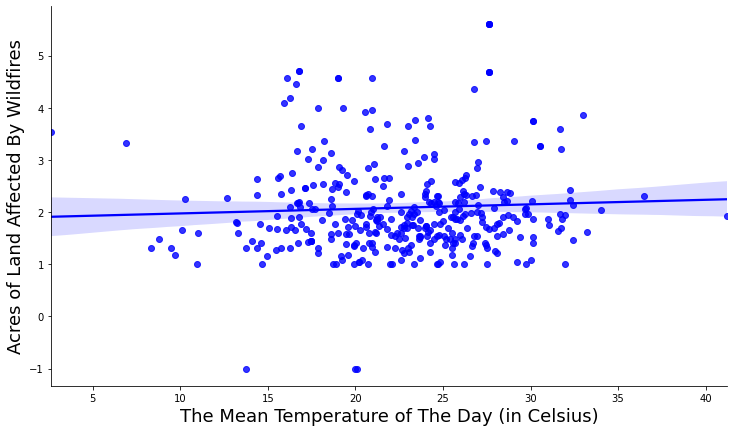

In [17]:
# plot relationship between the burning area and temperature 
sns.lmplot(y = 'AcresBurned_log10',
           x = 'Temp',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'blue'},
           scatter_kws={'color': 'blue'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Mean Temperature of The Day (in Celsius)', size=18)
plt.title('');

In [18]:
# carry out linear regression
acres_temp = df[['Temp', 'AcresBurned_log10']]
acres_temp.columns = ['Temp', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ Temp', acres_temp)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9026
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.343
Time:                        21:37:39   Log-Likelihood:                -499.33
No. Observations:                 372   AIC:                             1003.
Df Residuals:                     370   BIC:                             1011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8873      0.213      8.865      0.0

We are not able to interpret $\beta_1$ estimate (`coef`) on the original scale above since we log-transformed the data. However, we could determine that for every one unit increase in the temperature, the acres land affected by wildfires increases by (0.0005/100) = 0.000005, which means that the effect is really small. The p-value is 0.950, suggesting that these results happens due to random chance alone approximately 95% of the time. Therefore, we conclude that **there is not a significant relationship between the number of acres burned and temperature**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

### Acres burned V.S. Wind Speed

Plot the relationship between the acres burned and wind speed of the wildfire incidents across the years in this dataset to get a sense of what's going on.

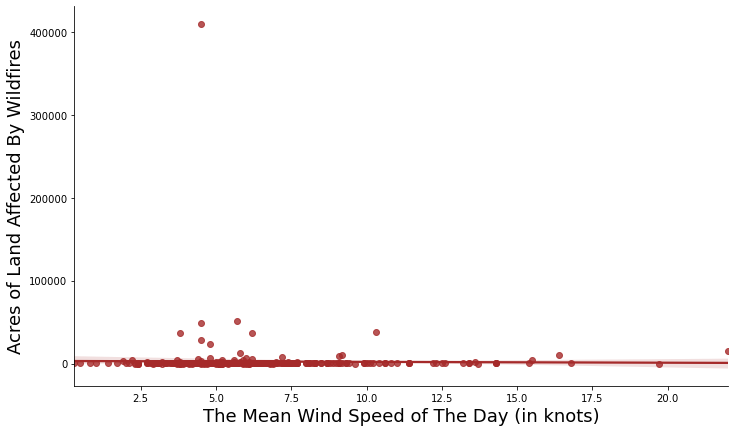

In [20]:
# Relationship between the arces burned and temperatures of wildfire incidents
sns.lmplot(y = 'AcresBurned',
           x = 'WindSpd',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Mean Wind Speed of The Day (in Knots)', size=18)
plt.title('');

The plot above shows no relationship between these two variables but note that there are outliers in acres burned. Overall, most of the data are clustered around zero acres. We will apply the transformed acres burned data from previous part. 

Use linear regression to determine the effect of wind speed on log 10 acres burned and take a look at the results.

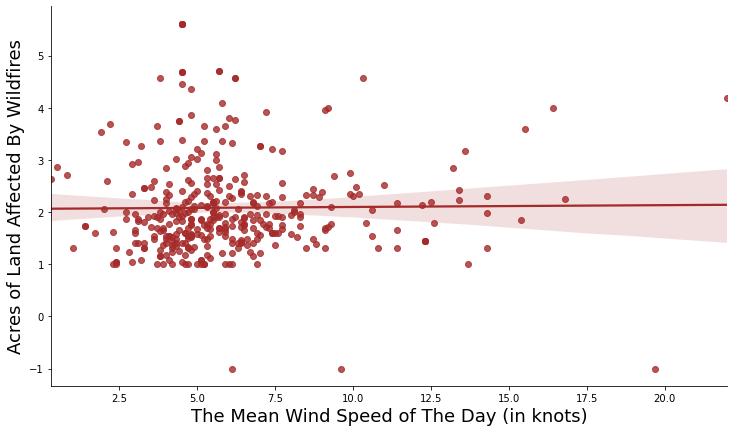

In [19]:
# Relationship between the arces burned and temperatures of wildfire incidents
sns.lmplot(y = 'AcresBurned_log10',
           x = 'WindSpd',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'brown'},
           scatter_kws={'color': 'brown'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Mean Wind Speed of The Day (in knots)', size=18)
plt.title('');

In [20]:
# carry out linear regression
acres_windspd = df[['WindSpd', 'AcresBurned_log10']]
acres_windspd.columns = ['WindSpd', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ WindSpd', acres_windspd)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.04285
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.836
Time:                        21:38:53   Log-Likelihood:                -499.76
No. Observations:                 372   AIC:                             1004.
Df Residuals:                     370   BIC:                             1011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0635      0.112     18.494      0.0

We could determine that for every one unit increase in the wind speed, the acres land affected by wildfires increases by (0.0163/100) = 0.000163, which means that the effect is really small. The p-value is 0.293, suggesting that these results happens due to random chance alone approximately 29.3% of the time. Therefore, we conclude that **there is not a significant relationship between the number of acres burned and wind speed**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

### Acres burned V.S. Relative Humidity Percentage

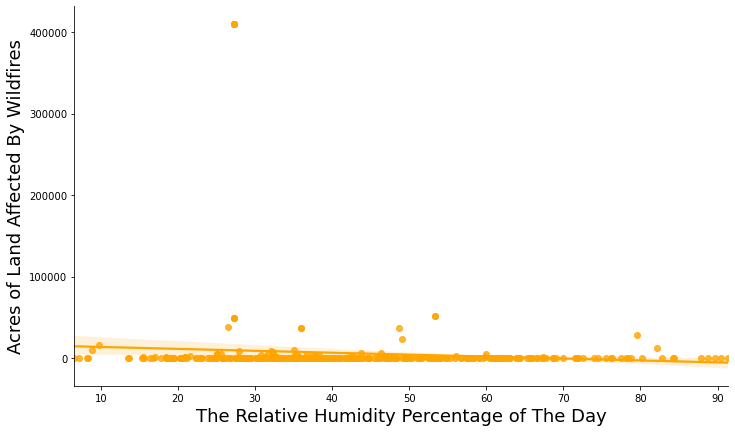

In [21]:
sns.lmplot(y = 'AcresBurned',
           x = 'RelaHumPct',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'orange'},
           scatter_kws={'color': 'orange'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Relative Humidity Percentage of The Day', size=18)
plt.title('');

The plot above shows a slight negative relationship between these two variables but note that there are outliers in acres burned. Overall, most of the data are clustered around zero acres. We will apply the transformed acres burned data from previous part. 


Use linear regression to determine the effect of relative humidity percentage on log 10 acres burned and take a look at the results.

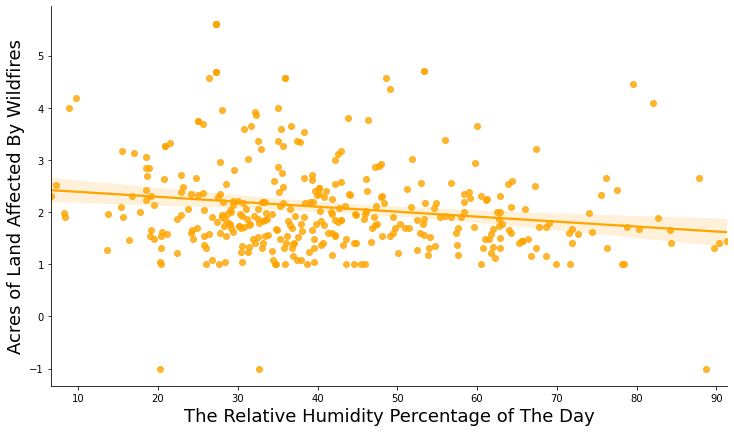

In [22]:
sns.lmplot(y = 'AcresBurned_log10',
           x = 'RelaHumPct',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'orange'},
           scatter_kws={'color': 'orange'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Relative Humidity Percentage of The Day', size=18)
plt.title('');

In [23]:
# carry out linear regression
acres_rhp = df[['RelaHumPct', 'AcresBurned_log10']]
acres_rhp.columns = ['RelaHumPct', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ RelaHumPct', acres_rhp)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.80
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           0.000661
Time:                        21:39:25   Log-Likelihood:                -493.95
No. Observations:                 372   AIC:                             991.9
Df Residuals:                     370   BIC:                             999.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4831      0.125     19.795      0.0

We could determine that for every one unit increase in the relative humidity percent, the acres land affected by wildfires decreases by (0.0069/100) = 0.000069, which means that the effect is really small. However, the p-value is 0.007, suggesting that these results happen due to random chance alone approximately 0.7% of the time. Therefore, we conclude that **there is a significant relationship between the number of acres burned and relative humidity percent**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

## Linear Regression with combined climate features

### Acres burned V.S. Temperature, Wind Speed

In [24]:
#Combine Temperature, Wind Speed
df['Temp_Wsp'] = df['Temp'] + df['WindSpd'] 

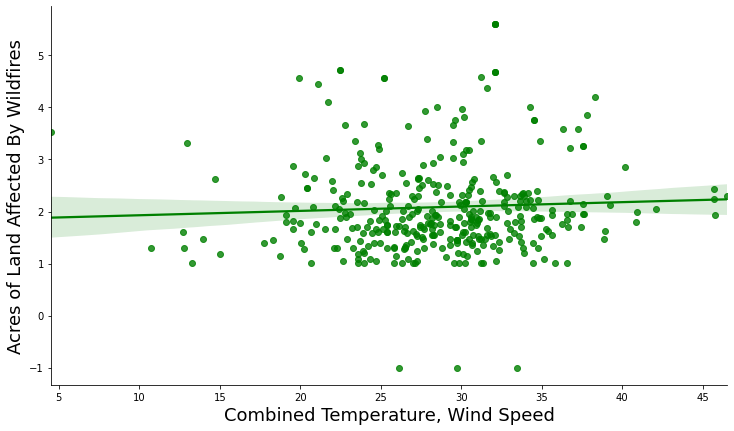

In [25]:
sns.lmplot(y = 'AcresBurned_log10',
           x = 'Temp_Wsp',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'green'},
           scatter_kws={'color': 'green'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('Combined Temperature, Wind Speed', size=18)
plt.title('');

In [26]:
# carry out linear regression
acres_rhp = df[['Temp_Wsp', 'AcresBurned_log10']]
acres_rhp.columns = ['Temp_Wsp', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ Temp_Wsp', acres_rhp)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9749
Date:                Mon, 15 Mar 2021   Prob (F-statistic):              0.324
Time:                        21:40:06   Log-Likelihood:                -499.30
No. Observations:                 372   AIC:                             1003.
Df Residuals:                     370   BIC:                             1010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8438      0.248      7.427      0.0

We could determine that for every one unit increase in temperature and wind speed, the acres land affected by wildfires increases by (0.0045/100) = 0.000045, which means that the effect is really small. However, the p-value is 0.559, suggesting that these results happen due to random chance alone approximately 55.9% of the time. Therefore, we conclude that **there is not a significant relationship between the number of acres burned and temperature + wind speed**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

### Acres burned V.S. Relative Humidity Percentage, Temperature

In [27]:
#Combine Relative Humidity Percentage, Temperature
df['Humid_Temp'] = df['RelaHumPct'] + df['Temp']

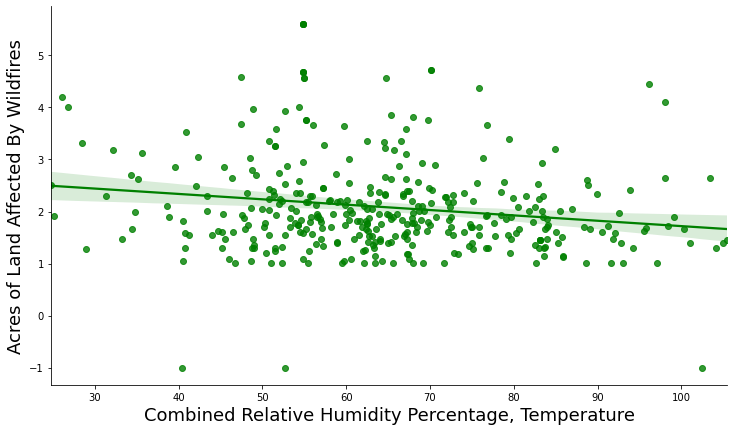

In [28]:
sns.lmplot(y = 'AcresBurned_log10',
           x = 'Humid_Temp',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'green'},
           scatter_kws={'color': 'green'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('Combined Relative Humidity Percentage, Temperature', size=18)
plt.title('');

In [30]:
# carry out linear regression
acres_rhp = df[['Humid_Temp', 'AcresBurned_log10']]
acres_rhp.columns = ['Humid_Temp', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ Humid_Temp', acres_rhp)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.68
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           0.000701
Time:                        21:40:37   Log-Likelihood:                -494.00
No. Observations:                 372   AIC:                             992.0
Df Residuals:                     370   BIC:                             999.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7497      0.200     13.722      0.0

We could determine that for every one unit increase in relative humidity percentage and temperature, the acres land affected by wildfires decreases by (-0.008/100) = -0.00008, which means that the effect is really small. However, the p-value is 0.004, suggesting that these results happen due to random chance alone approximately 0.4% of the time. Therefore, we conclude that **there is a significant relationship between the number of acres burned and relative humidity percentage + temperature**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

### Acres burned V.S. Relative Humidity Percentage, Wind Speed

In [31]:
#Combine Relative Humidity Percentage, Wind Speed
df['Humid_Wsp'] = df['RelaHumPct'] + df['WindSpd'] 

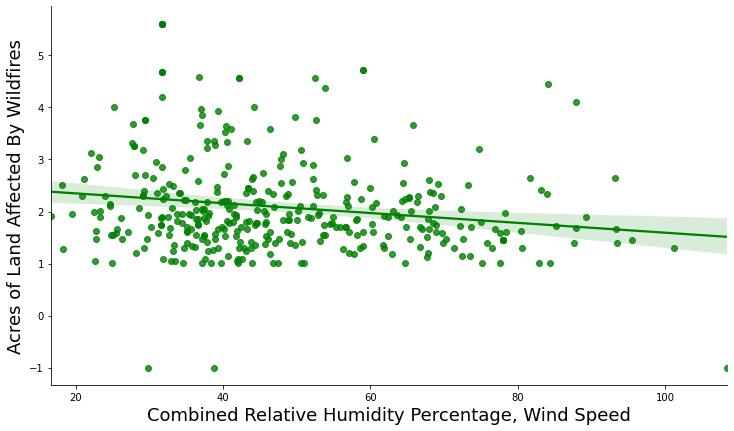

In [32]:
sns.lmplot(y = 'AcresBurned_log10',
           x = 'Humid_Wsp',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'green'},
           scatter_kws={'color': 'green'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('Combined Relative Humidity Percentage, Wind Speed', size=18)
plt.title('');

In [33]:
# carry out linear regression
acres_rhp = df[['Humid_Wsp', 'AcresBurned_log10']]
acres_rhp.columns = ['Humid_Wsp', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ Humid_Wsp', acres_rhp)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.60
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           0.000734
Time:                        21:41:01   Log-Likelihood:                -494.05
No. Observations:                 372   AIC:                             992.1
Df Residuals:                     370   BIC:                             999.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5374      0.141     17.962      0.0

We could determine that for every one unit increase in relative humidity percentage and wind speed, the acres land affected by wildfires decreases by (-0.0065/100) = -0.000065, which means that the effect is really small. However, the p-value is 0.012, suggesting that these results happen due to random chance alone approximately 1.2% of the time. Therefore, we conclude that **there is a significant relationship between the number of acres burned and relative humidity percentage + wind speed**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

### Acres burned V.S. Relative Humidity Percentage, Temperature, Wind Speed

In [35]:
#Combine Relative Humidity Percentage, Temperature, Wind Speed
df['Humid_Temp_Wsp'] = df['RelaHumPct'] + df['Temp'] + df['WindSpd'] 

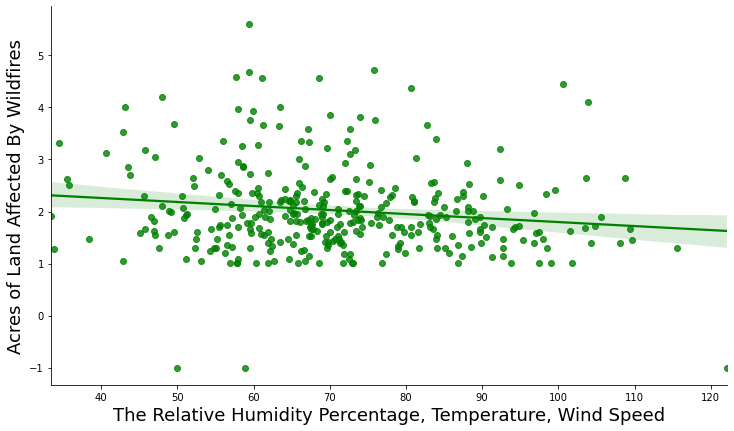

In [36]:
sns.lmplot(y = 'AcresBurned_log10',
           x = 'Humid_Temp_Wsp',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'green'},
           scatter_kws={'color': 'green'})
plt.ylabel('Acres of Land Affected By Wildfires', size=18)
plt.xlabel('The Relative Humidity Percentage, Temperature, Wind Speed', size=18)
plt.title('');

In [37]:
# carry out linear regression
acres_rhp = df[['Humid_Temp_Wsp', 'AcresBurned_log10']]
acres_rhp.columns = ['Humid_Temp_Wsp', 'AcresBurned_log10']

outcome, predictors = patsy.dmatrices('AcresBurned_log10 ~ Humid_Temp_Wsp', acres_rhp)

# Now use statsmodels to intialize an OLS linear model
# This step initializes the model, and provides the data (but does not actually compute the model)
mod_log = sm.OLS(outcome, predictors)

# fit the model
res_log = mod_log.fit()

# Check out the results
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:      AcresBurned_log10   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.575
Date:                Sat, 13 Mar 2021   Prob (F-statistic):            0.00622
Time:                        20:39:09   Log-Likelihood:                -439.18
No. Observations:                 358   AIC:                             882.4
Df Residuals:                     356   BIC:                             890.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5684      0.203     12.

We could determine that for every one unit increase in relative humidity percentage, temperature, and wind speed, the acres land affected by wildfires decreases by (-0.0077/100) = -0.000077, which means that the effect is really small. However, the p-value is 0.006, suggesting that these results happen due to random chance alone approximately 0.6% of the time. Therefore, we conclude that **there is a significant relationship between the number of acres burned and relative humidity percentage + temperature + wind speed**. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.

## Results: Model Comparison and Interpretation

By establishing OLS model with both single climate variables as well as combined variables, we observed that relative humidity percentage is the climate feature that explains for **the most variance (0.02)** in the area burned. Although the model with relative humidity percentage (2%) is classified as a weak model, it is the best result we get across the rest of the models. 

#### OLS models with single variable
- The temperature seems not having any correlation with the burning areas because it accounts for 0% of the variance and the observed temperature happens due to random chance alone approximately 95% of the time. 
- The wind speed also seems to have solely minor effect on the burning areas as it accounts for 0.3% of the variance and the observed wind speed happens due to random chance alone approximately 29.3% of the time. 
- The relative humidity rate seems to have the most correlation with the burning areas as it accounts for 2% of the variance and the observed relative humidity rate happens due to random chance alone approximately 0.7% of the time. 

#### Single variable vs. Multiple variables 
- The OLS models with combined variables have similar or even lower adjusted R-squared value than the models with single variable. Therefore, adding more features did not help account for more variance in our data set. By comparing the results from the models established using single variables and mutiple variables, we decide that the model which has the most significant effect is the OLS model with relative humidity rate alone.

#### OLS model with Relative Humidity Percent 
- Because we applied the log transformation to the burned area, for every one unit increase in the relative humidity percent, the acres land affected by wildfires decreases by (0.0069/100) = 0.000069, which means that the effect is really small. However, the p-value is 0.007, suggesting that these results happen due to random chance alone approximately 0.7% of the time. Therefore, we conclude that there is a significant relationship between the number of acres burned and relative humidity percent. We also know that this analysis is likely failing to take into account the effect of confounders we discussed in class, limiting our confidence in this result.


## A Further Step: Prediction

To take a further step and find out how our two most related factors humidity and windspeed can predict the scale of wildfire acresburned. We tried an machine learning model Decision Tree since we are classifying a multi class label. To generate our label for prediction, we used the class defined by nwcg: https://www.nwcg.gov/term/glossary/size-class-of-fire#:~:text=Class%20D%20%2D%20100%20acres%20or,G%20%2D%205%2C000%20acres%20or%20more.

Define a function `set_class()` which takes as input `area` and `return` a class label on the given `area`.

In [6]:
def set_class(area):
    if area < 1/4:
        return "A"
    if area < 10:
        return "B"
    if area < 100:
        return "C"
    if area < 300:
        return "D"
    if area < 1000:
        return "E"
    if area < 5000:
        return "F"
    else:
        return "G"

In [7]:
# apply the set_class() on 'AcresBurned' and store in a new column called 'class'
df['class'] = df['AcresBurned'].apply(set_class)

In [9]:
#data partition 
df_X = df[['WindSpd','RelaHumPct']]
df_Y = df['class']

X_train, X_test = train_test_split(df_X, test_size = 0.2, random_state = 10)
Y_train, Y_test = train_test_split(df_Y, test_size = 0.2, random_state = 10)

Define a function `train_DT()` which takes as input `X` and `Y` and `return` a Decision Tree model trained on the given `X`,`Y`.

In [13]:
def train_DT(X, Y):
    clf = DecisionTreeClassifier()
    clf.fit(X, Y)
    return clf

In [14]:
#train the decision tree model
model = train_DT(X_train, Y_train)

In [15]:
#take a look at the report for train data
pred_train = model.predict(X_train)
print(classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           C       0.99      1.00      1.00       171
           D       1.00      1.00      1.00        56
           E       0.96      1.00      0.98        22
           F       1.00      0.96      0.98        23
           G       1.00      0.95      0.98        22

    accuracy                           0.99       297
   macro avg       0.99      0.99      0.99       297
weighted avg       0.99      0.99      0.99       297



In [16]:
#take a look at the report for test data
pred_test = model.predict(X_test)
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         0
           C       0.58      0.64      0.61        39
           D       0.29      0.20      0.24        20
           E       0.14      0.11      0.12         9
           F       0.67      0.67      0.67         3
           G       0.43      0.75      0.55         4

    accuracy                           0.47        75
   macro avg       0.35      0.39      0.36        75
weighted avg       0.45      0.47      0.45        75



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results: Prediction summary

#### Model Assessment
- Accuracy - What % were predicted correctly?
- Sensitivity (Recall) - Of those that were positives, what % were predicted to be positive?  $\frac {TP}{(TP + FN)}$
- Specificity - Of those that were actually negatives, what % were predicted to be negative? $\frac {TN}{(TN + FP)}$
- Precision (Positive Predictive Value, PPV)  $\frac {TP}{(TP + FP)}$


#### Interpretation 
The accuracy in the training set is 0.99 with a f1-score of between 0.98 and 1. It means for training data, our model can predict 99% correct data. Since Decision Tree model uses many branches to classify, this is a result of overfitting. We must look at the test data to determine the model. The accuracy in the testing data is 0.47 with a f1-score between 0.12 to 0.61. This accuracy is 0.47, just close to the random chance which is 50%. F1-score shows that the model considered sensitivity and specificity and there're only some of the data to be predict without so many false positive or false negative. It's not a good recall and specificity, lots of wrong data were made. The model built by using Humidity and Windspeed cannot directly predict the scale of wildfire acresburned but resulted in random chance. Specifically, it classifies wildfire to Class C with an f1-score of 0.61. Since Class C contains more data, the result is relatively better. However, it's less than what a accurate prediction can be. Since humidity is the only significant factor of the sacle of wildfire and windspeed is less significant. It‘s hard to predict wildfire acresburned accurately because the factors themselves are less correlated to wildfire sacle. So some more factors should be find to contain in the model and more data are needed for our model. 

# Ethics & Privacy

When it comes to the ethics of the project, we believe that we have done the project in a legal and fair way. Also, our project is going to be done for academic use, instead of commercial purpose. Looking at the data sources we are going to use in the project, which are from the website of Kaggle and NOAA database. According to the privacy terms of Kaggle, we have the rights to download the dataset, but we are not allowed to modify or exploit other ways without the prior consent of the datasets’ owners. Besides Kaggle, we would always adhere to the principles of data privacy, and we will use the data if and only if we have the permission to do so. Accuracy of data from kaggle should be doubted and evaluated. To eliminate the inaccuracy of the data, we can choose some data values (yearly acres burned by the wildfire, temperature for specific day, or fatalities) and search them separately, comparing them to examine their liability.

However, there exists ethical issues with the final dataset. All wildfire events in this dataset occurred in California, so our analysis does not necessarily generalize about all wildfire incidents in other states. On the other hand, in order to access the weather data for the date of the wildfire event, we use the weather station coordinates to match the wildfire incident coordinates to merge the two data. Some incidents may be missed if it is not in the coordinate range we set, which may have slightly altered the analysis. The analysis may be helpful to prevent the future wildfire in an indirect way, since it shows us the pivotal variables that would effect the scale of the wildfire, raising our awareness of the importance of climate change.


# Conclusion & Discussion

Since wildfire is one of the most common natural (or artificial) disaster in California, and the record of wildfires has been updated so many times in the past decade, we wanted to figure out the reasons. Global warming, a hot topic in the world in recent years, has caught our eyes. We have noticed that the global warming is mainly focusing on the climate change, and we decided to look the climate variables, trying to discover their effects on the scale of the wildfires. As a hypothesis, we believe that there is a relationship between the scale (burning area) of wildfire and climate variables in California that are associated with global warming such as humidity, temperature, and precipitation. 

We began by cleaning the data set and performing some descriptive analysis. We have realized that for precipitation data, the median is 0 and there are a couple of outliers, showing its irrelevance. Thus, we decided to not perform further analysis on precipitation. For analysis, we have performed OLS regression with single climate feature, looking for the correlation between the scale of wildfire and temperature, windspeed, and humidity.  As a result, only the humidity variable has a significant relationship with the scale of wildfire. Then, we have performed OLS regression with combined climate feature: scale of wildfire with respect to temperature + wind speed, humidity + temperature, humidity + wind speed, and humidity + temperature + wind speed. As a result, we discovered that there is a significant relationship between the scale of wildfire and humidity + temperature, and humidity + wind speed, and as well as humidity + temperature + wind speed. Overall, we do not see a clear relationship between the scale of the wildfire and these climate variables except humidity. Although there are significant relationships on combined features, they would be potentially incorrect since the humidity was the only significant variable. In the last part of our project, we have created a prediction model on the variable of humidity and wind speed with a machine learning model Decision Tree. After training the model, we have gotten an accuracy of 0.47% in the test data, which indicates that it can  predict the scale of the wildfire just due to random chance, however for Class C it's f1-score is 0.61 relatively better than others, but it is far from an accurate model, which may suggest we need more data sample for each class. It is reasonable result, since we discovered that humidity is the only significant variable to the wildfire scale in OLS regression with single climate feature. 

Overall, we accept part of the Hypothesis that there is the significant relationship between relative humidity and wildfire acres burned with a p-value of 0.007. The R squared in the linear regression analysis suggest that 2% of the variance in wildifire burned acres is explained by relative humidity. We fail to reject part of the Hypothesis that there's significant relationship between temperature, windspeed, and burning area due to the respective large p-value of 0.95 and 0.293. These large p values suggest that there's not a significant relationship in these variables. 

Limitations in our project must be considered. When we merge the weather data with the wildfire data, we cannot match it exactly according to the location of wildfire and the location of weather stations. We choosed a an area of 22.2km * 20km, and any weather stations within area can represent the weather condition of the wildire. Although weather may not change so much in this range, it's still not an accurate data. Also, after we merging data frames, obeservations colloected are only 372 samples which is less to represent the population, lots of data were missed during data wrangling. 

To take a further step in this research question and our project, we think that taking more climate variable such as wind direction and air pressure into account could yield interesting results, as it can help us to discover more related variables and avoid confounder variables. Moreover, we can extend the region to not only in California, but in other states or the entire region, since this can help us to understand the reason behind wildfires better.

# Team Contributions

**Jiayi Zhao**
    - Research Question
    - Hypothesis
    - Data Cleaning
    - Format Adjustment 
    - Data Analysis 
    
**Xiaotong Zeng**
    - Background & Prior work
    - Data Sets
    - Data Analysis
    - Presentation Slides

**Yunyi Huang**
    - Overview
    - Data Analysis
    - Ethics & Privacy
    - Conclusion & Discussion

**Wenbo Hu**
    - Data Cleaning & Wrangling
    - Data Analysis
    - DT Prediction
    - Team Expectations
    - Project Timeline